In [3]:
import pandas as pd
import numpy as np

import tabula
from tabula import read_pdf

In [4]:
df_sub1 = read_pdf("Annual-AP-Program-Participation-1956-2020_1.pdf", pages=1)
df_sub2 = read_pdf("Annual-AP-Program-Participation-1956-2020_1.pdf", pages=2)
df_sub1=df_sub1[0]
df_sub2=df_sub2[0]

df=pd.concat([df_sub1, df_sub2], axis=0)

In [5]:
df.head()

,Year,Schools*,Students no dat,Exams,Colleges
0,1955-56,104,"1,229","2,199",130
1,1956-57,212,"2,068 no dat","3,772",201
2,1957-58,355,"3,715 no dat","6,800",279
3,1958-59,560,"5,862 no dat","8,265",391
4,1959-60,890,"10,531 no dat","14,158",567


In [6]:
old_columns=['Schools*', 'Students no dat', 'Exams', 'Colleges']
new_columns=['num_schools', 'num_students', 'num_exams', 'num_colleges']             

for i in range(4):
    new=new_columns[i]
    old=old_columns[i]
    df[new]=df[old].str.rstrip("no dat")
    df[new]=df[new].str.replace(',','')
    df[new]=pd.to_numeric(df[new])

df=df.drop(columns=['Schools*', 'Students no dat', 'Exams', 'Colleges'])

In [7]:
df.to_csv("data/Ann_AP_Participation")

In [8]:
df.tail()

,Year,num_schools,num_students,num_exams,num_colleges
13,2015-16,21953,2611172,4704980,4199
14,2016-17,22169,2741426,4957931,4221
15,2017-18,22612,2808990,5090324,4287
16,2018-19,22678,2825710,5098815,4361
17,2019-20,22152,2642630,4751957,3160


In [1]:
113443+67632 

181075

In [10]:
CSA=pd.read_csv("data/CSA_ALL.csv")
CSP=pd.read_csv("data/CSP_ALL.csv")

In [11]:
ALL = pd.concat([CSA, CSP], axis=0)

In [23]:
CS=ALL.groupby("Year").sum()[:-1]
CS

,Unnamed: 0,Total,Total Passed,% Passed,Num Black,Black Passed,% Black Passed,% Black,Num Hispanic,Hisp Passed,...,% Male NA Passed,% Male NA,Num 2+ Male,Male 2+ Passed,% Male 2+ Passed,% Male 2+,Num Other Male,Male Other Passed,% Male Other Passed,% Male Other
Year,,,,,,,,,,,,,,,,,,,,,
2010,15300,19390,12550,3454.37,825,216,575.95,161.13,1466,561,...,106.67,13.93,0,0,0.00,0.00,530,326,1276.66,109.48
2011,15351,21139,13461,3096.87,893,268,831.41,152.96,1752,608,...,163.16,16.41,0,0,0.00,0.00,528,310,1342.16,112.17
2012,15402,24782,15675,3122.07,1014,269,821.04,173.91,1919,712,...,165.23,11.18,0,0,0.00,0.00,624,353,1432.14,133.42
2013,15453,29555,19760,3268.78,1090,378,1144.36,169.06,2408,1041,...,462.37,26.66,0,0,0.00,0.00,851,550,1448.60,111.78
2014,15504,37327,22722,2963.04,1469,481,1009.72,170.94,3270,1240,...,374.43,18.45,0,0,0.00,0.00,1186,680,1547.93,131.92
2015,15555,46344,29561,3048.88,1784,658,1136.70,188.48,4272,1681,...,540.35,22.99,0,0,0.00,0.00,1242,765,1729.41,123.84
2016,15606,54379,34680,3099.03,2027,662,999.08,192.93,6256,2585,...,350.00,13.88,1770,1181,2223.26,168.89,57,18,218.57,2.65
2017,22032,99868,69960,6984.20,5066,1989,2552.13,491.86,14770,7669,...,383.65,22.50,3246,2337,5296.88,385.84,19,0,0.00,0.70
2018,22134,130904,90773,6806.25,7310,2838,2599.06,521.51,20786,10642,...,611.43,35.16,4190,3036,5515.97,382.13,3,0,0.00,0.09


In [41]:
total=df[-11:]
total.set_index(CS.index, inplace=True)
total

,Year,num_schools,num_students,num_exams,num_colleges
Year,,,,,
2010,2009-10,17861,1845006,3213225,3855
2011,2010-11,18340,1973545,3456020,4001
2012,2011-12,18647,2099948,3698407,4005
2013,2012-13,18920,2218578,3938100,4027
2014,2013-14,19493,2342528,4176200,4121
2015,2014-15,21594,2483452,4478936,4154
2016,2015-16,21953,2611172,4704980,4199
2017,2016-17,22169,2741426,4957931,4221
2018,2017-18,22612,2808990,5090324,4287


In [44]:
errything=pd.concat([CS, total], axis=1)
errything["Year"]=errything.index

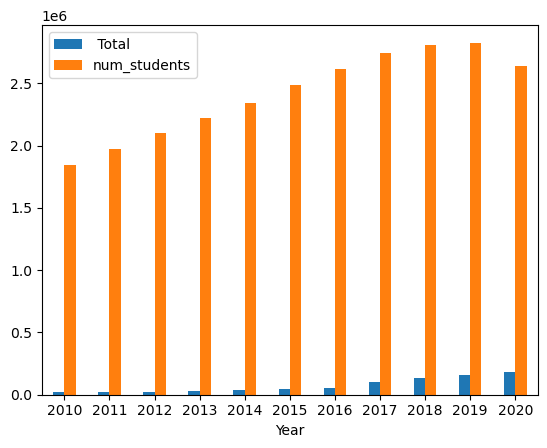

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt 

ax = errything.plot(x="Year", y=[" Total", "num_students"], kind="bar", rot=0)

In [49]:
errything["CS %"]=errything[" Total"]/errything["num_students"]

Text(0, 0.5, 'Percent of Students')

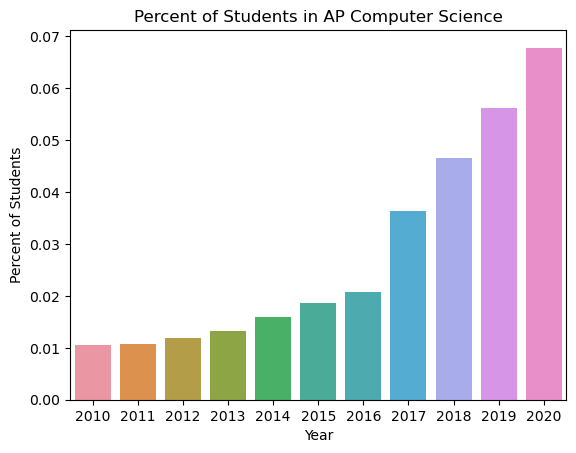

In [51]:
sns.barplot(data=errything, x="Year", y= "CS %")
plt.title("Percent of Students in AP Computer Science")
plt.ylabel("Percent of Students")

In [52]:
errything["CS %"]

Year
2010    0.010509
2011    0.010711
2012    0.011801
2013    0.013322
2014    0.015934
2015    0.018661
2016    0.020826
2017    0.036429
2018    0.046602
2019    0.056112
2020    0.067807
Name: CS %, dtype: float64

In [55]:
0.067807*100/ 0.010509

645.2278998953279

In [56]:
0.010509*645.2278998953279

6.7807